In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#brasil = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Projeto/covid-19-data-master/public/data/vaccinations/country_data/Brazil.csv')
data = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Final_Project/covid-19-data-master/public/data/latest/owid-covid-latest.csv')


In [106]:
data = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Final_Project/covid-19-data-master/public/data/latest/owid-covid-latest.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    233 non-null    object 
 1   continent                                   220 non-null    object 
 2   location                                    233 non-null    object 
 3   last_updated_date                           233 non-null    object 
 4   total_cases                                 228 non-null    float64
 5   new_cases                                   228 non-null    float64
 6   new_cases_smoothed                          228 non-null    float64
 7   total_deaths                                220 non-null    float64
 8   new_deaths                                  220 non-null    float64
 9   new_deaths_smoothed                         220 non-null    float64
 10  total_cases_pe

In [4]:
def plot_one_relative_scatter(data, metric1, metric2, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.scatter(data[metric1],data[metric2]/data['population'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.savefig(metric1+'_'+metric2+'.pdf')
    plt.show()

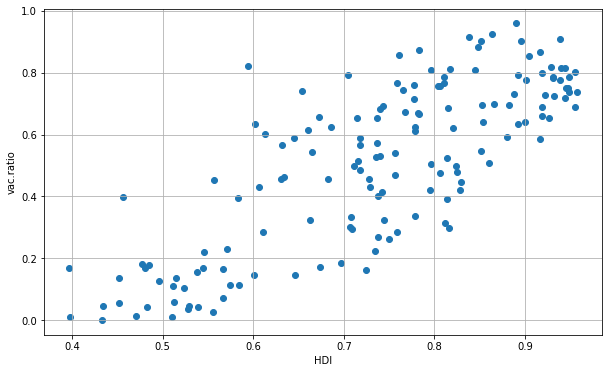

In [5]:
plot_one_relative_scatter(data,'human_development_index','people_fully_vaccinated','HDI','vac.ratio')  

In [93]:
data = data.fillna(0)

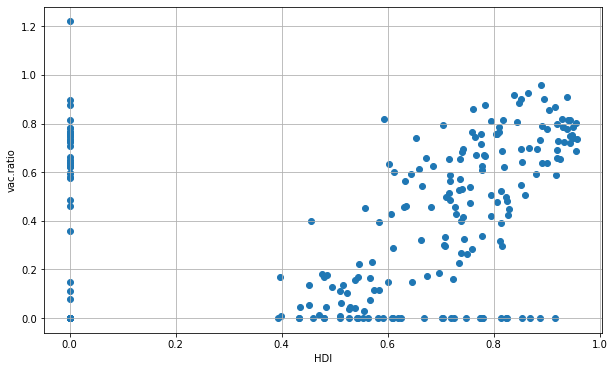

In [8]:
plot_one_relative_scatter(data,'human_development_index','people_fully_vaccinated','HDI','vac.ratio')  

In [11]:
def cut_low_events(data,metric,value):
    for i in range(data.shape[0]): # loop over all countries
        if data[metric][i] < value: 
            print(i,data['location'][i],data[metric][i])

In [12]:
cut_low_events(data,'human_development_index',0.1)

1 Africa 0.0
6 Anguilla 0.0
10 Aruba 0.0
11 Asia 0.0
23 Bermuda 0.0
26 Bonaire Sint Eustatius and Saba 0.0
30 British Virgin Islands 0.0
39 Cayman Islands 0.0
47 Cook Islands 0.0
52 Curacao 0.0
68 Europe 0.0
69 European Union 0.0
70 Faeroe Islands 0.0
71 Falkland Islands 0.0
75 French Polynesia 0.0
81 Gibraltar 0.0
83 Greenland 0.0
86 Guernsey 0.0
91 High income 0.0
98 International 0.0
102 Isle of Man 0.0
107 Jersey 0.0
112 Kosovo 0.0
123 Low income 0.0
124 Lower middle income 0.0
126 Macao 0.0
139 Monaco 0.0
142 Montserrat 0.0
147 Nauru 0.0
150 New Caledonia 0.0
155 Niue 0.0
156 North America 0.0
159 Oceania 0.0
175 Saint Helena 0.0
178 Saint Pierre and Miquelon 0.0
181 San Marino 0.0
189 Sint Maarten (Dutch part) 0.0
193 Somalia 0.0
195 South America 0.0
205 Taiwan 0.0
215 Turks and Caicos Islands 0.0
221 Upper middle income 0.0
225 Vatican 0.0
228 Wallis and Futuna 0.0


In [117]:
def make_pd_cut(data, metric1, metric2, value):
    if metric2 is not None:
        new_data = data[data[metric1] > value]
        final_data = new_data[data[metric2] > value]
    else:
        final_data = data[data[metric1] > value]
        
    return final_data
    

In [120]:
data_cut = make_pd_cut(data,'human_development_index','people_fully_vaccinated',0.0)

<ipython-input-117-0783ab6d3189>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = new_data[data[metric2] > value]


In [121]:
data_cut.shape

(154, 67)

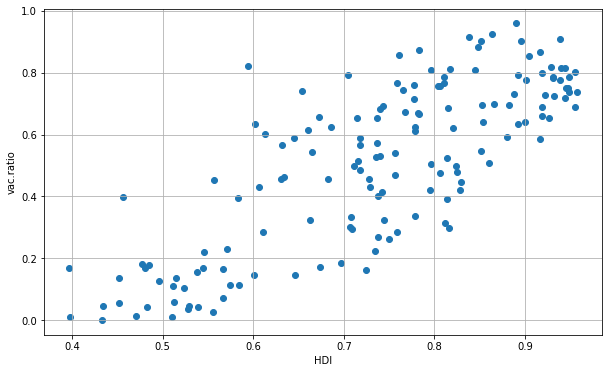

In [122]:
plot_one_relative_scatter(data_cut,'human_development_index','people_fully_vaccinated','HDI','vac.ratio')  

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Create the model

In [123]:
HDI = np.array(data_cut['human_development_index'])
vac_ratio = np.array(data_cut['people_fully_vaccinated'])

In [125]:
HDI.shape

(154,)

In [127]:
type(HDI)

numpy.ndarray

In [137]:
HDI = HDI.reshape(HDI.shape[0],1)
vac_ratio = vac_ratio.reshape(vac_ratio.shape[0],1)

In [138]:
vac_ratio.shape

(154, 1)

In [139]:
lin_reg.fit(HDI,vac_ratio)

LinearRegression()

In [134]:
lin_reg.fit(np.array([HDI]),np.array([vac_ratio]))

LinearRegression()

In [133]:
type(np.array([HDI]))

numpy.ndarray

In [73]:
lin_reg.intercept_

array([39268937.88875278])

In [140]:
coef = float(lin_reg.coef_)
print(coef)
inter = float(lin_reg.intercept_)
print(inter)

25090465.92520211
39268937.88875278


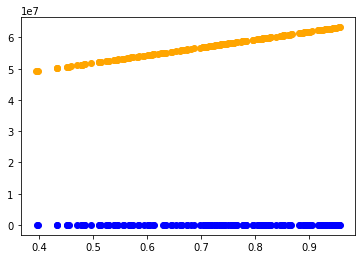

In [141]:
plt.plot()

plt.scatter(data['human_development_index'],coef*data['human_development_index'] + inter, color='orange', label='fit')
plt.scatter(data['human_development_index'],data['people_fully_vaccinated']/data['population'], color='blue', label='fit')

In [142]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [147]:
X.shape

(100, 1)

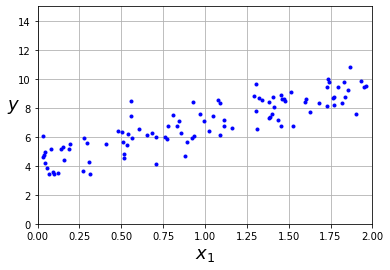

In [143]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [148]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression()

In [150]:
# Print the intercept and ang. coefficient values
print('intercept: ',linear.intercept_)
print('ang. coef.: ',linear.coef_) # y = 4 + 3 * X + np.random.randn(100, 1)

intercept:  [4.30290032]
ang. coef.:  [[2.64350657]]


<class 'numpy.ndarray'>


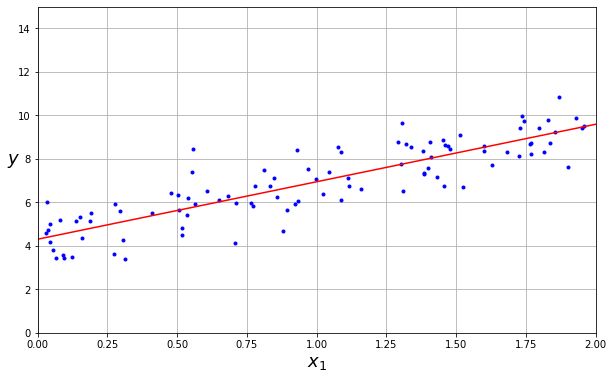

In [157]:
X_new = np.array([[0], [2]])
print(type(X_new))


plt.figure(figsize=(10,6))
plt.plot(X, y, "b.")  # blue dots (data)
plt.plot(X_new, linear.predict(X_new) , "r-", markersize = 20)  # red line (regression)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()